In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [3]:
df=pd.read_csv('packages/data/original/globalterrorismdb.csv',encoding = "ISO-8859-1")

fulldataset=df.copy()

c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
nullinfo= pd.DataFrame(fulldataset.isnull().sum())
nullinfo['percentage']=(nullinfo[0]/fulldataset.shape[0])*100
nullinfo

columns_to_drop=nullinfo.loc[nullinfo.percentage>=30].index

fulldataset=fulldataset.drop(columns_to_drop, axis=1)
fulldataset.shape

(181691, 48)

In [5]:
fulldataset=fulldataset.drop(['country_txt','region_txt','attacktype1_txt','targtype1_txt','targsubtype1_txt','natlty1_txt','weaptype1_txt','weapsubtype1_txt'],axis=1)
fulldataset.shape

(181691, 40)

In [6]:
#Missing value 

for Col_Name in list(fulldataset):
    if(fulldataset[Col_Name].dtype == object):       
        Temp_Imputation_Val = fulldataset[Col_Name].mode()[0]
        fulldataset[Col_Name] = fulldataset[Col_Name].fillna(Temp_Imputation_Val)
    elif(fulldataset[Col_Name].dtype == float):
        Temp_Imputation_Val = round(fulldataset[Col_Name].mean()) 
        fulldataset[Col_Name].fillna(Temp_Imputation_Val, inplace= True)
    else:
        Temp_Imputation_Val = round(fulldataset[Col_Name].median())
        fulldataset[Col_Name].fillna(Temp_Imputation_Val, inplace= True)

fulldataset.isnull().sum()

eventid         0
iyear           0
imonth          0
iday            0
extended        0
country         0
region          0
provstate       0
city            0
latitude        0
longitude       0
specificity     0
vicinity        0
crit1           0
crit2           0
crit3           0
doubtterr       0
multiple        0
success         0
suicide         0
attacktype1     0
targtype1       0
targsubtype1    0
corp1           0
target1         0
natlty1         0
gname           0
guncertain1     0
individual      0
weaptype1       0
weapsubtype1    0
nkill           0
nwound          0
property        0
ishostkid       0
dbsource        0
INT_LOG         0
INT_IDEO        0
INT_MISC        0
INT_ANY         0
dtype: int64

In [7]:
fulldataset['imonth']=np.where((fulldataset.imonth==0),fulldataset.imonth.mode(),fulldataset.imonth).astype('int64')
fulldataset['iday']=np.where((fulldataset.iday==0),fulldataset.iday.mode(),fulldataset.iday).astype('int64')
fulldataset[['imonth','iday']].nunique()

imonth    12
iday      31
dtype: int64

In [8]:
Cols_to_correct=['latitude','longitude','nkill','nwound']

def Outlier_correction(Data,Columns):
    for i in Columns:
        IQR=(Data[i].quantile(0.75))-(Data[i].quantile(0.25))
        positive_IQR=(Data[i].quantile(0.75))+ (1.5*IQR)
        negative_IQR=(Data[i].quantile(0.25))- (1.5*IQR)
        Data[i]=np.where(Data[i]>positive_IQR, positive_IQR, Data[i])
        Data[i]=np.where(Data[i]<negative_IQR, negative_IQR, Data[i])
    return(Data)
    
Outlier_correction(fulldataset, Cols_to_correct)

,eventid,iyear,imonth,iday,extended,country,region,provstate,city,latitude,...,weapsubtype1,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,2,Baghdad,Santo Domingo,18.456792,...,11.0,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,5,15,0,130,1,Federal,Mexico city,19.371887,...,11.0,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,15,0,160,5,Tarlac,Unknown,15.478598,...,11.0,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,15,0,78,8,Attica,Athens,37.997490,...,16.0,2.0,3.0,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,15,0,101,4,Fukouka,Fukouka,33.580412,...,11.0,2.0,3.0,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,11,Middle Shebelle,Ceelka Geelow,2.359673,...,5.0,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,10,Lattakia,Jableh,35.407278,...,11.0,2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,5,Maguindanao,Kubentog,6.900742,...,18.0,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,6,Manipur,Imphal,24.798346,...,7.0,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


In [9]:
Categ_Vars = fulldataset.loc[:,fulldataset.dtypes == object].columns
Categ_Vars

Index(['provstate', 'city', 'corp1', 'target1', 'gname', 'dbsource'], dtype='object')

In [10]:
fulldataset[Categ_Vars]=fulldataset[Categ_Vars].apply(preprocessing.LabelEncoder().fit_transform)
fulldataset[Categ_Vars].dtypes

provstate    int32
city         int32
corp1        int32
target1      int32
gname        int32
dbsource     int32
dtype: object

In [11]:
Train, Test = train_test_split(fulldataset, test_size=0.2, random_state = 123)

In [12]:
Train_X = Train.drop(['gname'], axis = 1).copy()
Train_Y = Train['gname'].copy()
Test_X = Test.drop(['gname'], axis = 1).copy()
Test_Y = Test['gname'].copy()

In [13]:
from sklearn.tree import DecisionTreeClassifier
DT1 = DecisionTreeClassifier(random_state=100, min_samples_leaf=50)
DT1_Model = DT1.fit(Train_X, Train_Y)
Test_Pred_DT = DT1_Model.predict(Test_X)

In [14]:
Confusion_Mat_DT = confusion_matrix(Test_Y, Test_Pred_DT) 
Confusion_Mat_DT

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
print(accuracy_score(Test_Y, Test_Pred_DT))

0.8448223671537467


In [16]:
def evaluation(modele, nom_modele, X_train, X_test, y_train, y_test, plot_roc = False):
        """Cette fonction permet d'évaluer un modèle
        """
        from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
        from sklearn.model_selection import learning_curve
        import numpy as np
        
        y_pred = modele.predict(X_test)
        
        print(f"La precision du modèle : {accuracy_score(y_test, y_pred)}")
        print(f"Matrice de confusion : \n{confusion_matrix(y_test, y_pred)}")
        print(f"Rapport de classification : \n{classification_report(y_test, y_pred)}")
        
        N, train_score, test_score = learning_curve(modele, X_train, y_train, cv = 5, train_sizes = np.linspace(0.1, 1, 10))
        
        fig, axs = plt.subplots(1, 2, figsize = (17, 8))  
        
        axs[0].plot(N, train_score.mean(axis = 1), label = "score_entrainement")
        axs[0].plot(N, test_score.mean(axis = 1), label = "score_test")
        axs[0].set_title(f"Evaluation {nom_modele}")
        axs[0].set_xlabel(f"Tailles")
        axs[0].set_ylabel(f"Scores")
        axs[0].legend()
        
        plot_roc_curve(modele, X_test, y_test, ax = axs[1])
        axs[1].set_title(f"Courbe ROC {nom_modele}")
         
        fig.tight_layout(w_pad = 3)
        

La precision du modèle : 0.8448223671537467
Matrice de confusion : 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.25      0.75      0.38         4
          10       0.00      0.00      0.00         4
          13       0.38      0.33      0.35         9
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          31       0.00   

c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

NameError: name 'plot_roc_curve' is not defined

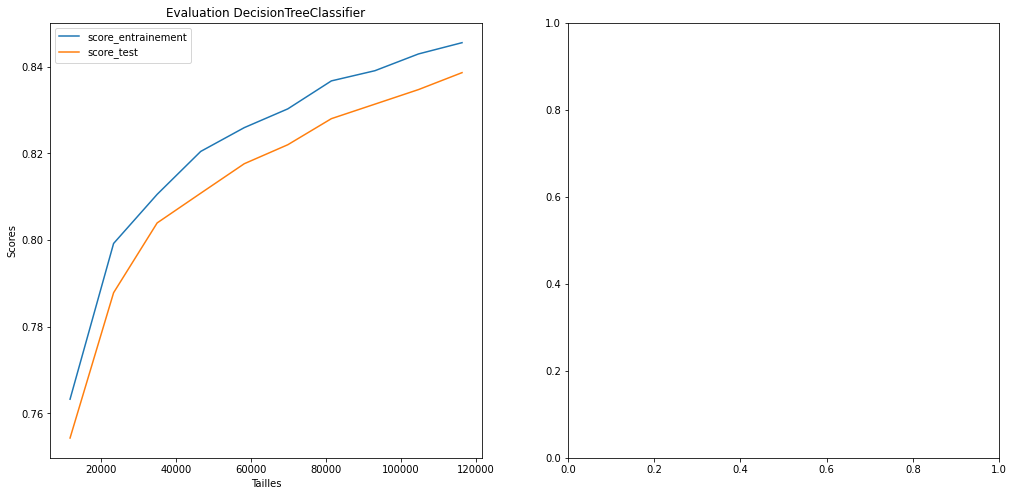

In [18]:
evaluation(DT1_Model, "DecisionTreeClassifier", Train_X, Test_X, Train_Y, Test_Y)